In [6]:
import pandas as pd

In [18]:
# Loading the dataset for Exploratory Data Analysis (EDA)
file_path = 'LengthOfStay.csv'
data_eda = pd.read_csv(file_path)

print(data_eda)

          eid       vdate rcount gender  dialysisrenalendstage  asthma  \
0           1   8/29/2012      0      F                      0       0   
1           2   5/26/2012     5+      F                      0       0   
2           3   9/22/2012      1      F                      0       0   
3           4    8/9/2012      0      F                      0       0   
4           5  12/20/2012      0      F                      0       0   
...       ...         ...    ...    ...                    ...     ...   
99995   99996   1/28/2012      3      M                      0       0   
99996   99997    8/6/2012      0      M                      0       0   
99997   99998   7/23/2012      1      M                      0       0   
99998   99999  12/19/2012      0      M                      0       0   
99999  100000    3/6/2012      0      F                      0       0   

       irondef  pneum  substancedependence  psychologicaldisordermajor  ...  \
0            0      0           

In [19]:
# Performing an Exploratory Data Analysis
# 1. Descriptive statistics for numerical columns
descriptive_stats = data_eda.describe()

print(descriptive_stats)

                 eid  dialysisrenalendstage         asthma        irondef  \
count  100000.000000          100000.000000  100000.000000  100000.000000   
mean    50000.500000               0.036420       0.035270       0.094940   
std     28867.657797               0.187334       0.184462       0.293134   
min         1.000000               0.000000       0.000000       0.000000   
25%     25000.750000               0.000000       0.000000       0.000000   
50%     50000.500000               0.000000       0.000000       0.000000   
75%     75000.250000               0.000000       0.000000       0.000000   
max    100000.000000               1.000000       1.000000       1.000000   

               pneum  substancedependence  psychologicaldisordermajor  \
count  100000.000000        100000.000000               100000.000000   
mean        0.039450             0.063060                    0.239040   
std         0.194664             0.243072                    0.426499   
min         0.

In [20]:
# 2. Distribution of categorical variables
categorical_columns = data_eda.select_dtypes(include=['object']).columns
categorical_distributions = {col: data_eda[col].value_counts() for col in categorical_columns}

print(categorical_distributions)

{'vdate': 10/3/2012     333
6/14/2012     324
11/11/2012    324
9/27/2012     317
2/22/2012     315
             ... 
1/11/2012     230
7/6/2012      229
4/11/2012     227
12/1/2012     214
3/20/2012     212
Name: vdate, Length: 367, dtype: int64, 'rcount': 0     55031
1     15007
2      9987
3      8047
4      6941
5+     4987
Name: rcount, dtype: int64, 'gender': F    57643
M    42357
Name: gender, dtype: int64, 'discharged': 2/16/2012     316
6/19/2012     315
10/25/2012    315
3/9/2012      313
10/28/2012    312
             ... 
1/9/2013       23
1/10/2013       7
1/12/2013       2
1/11/2013       2
1/13/2013       1
Name: discharged, Length: 378, dtype: int64, 'facid': E    30755
A    30035
B    30012
C     4699
D     4499
Name: facid, dtype: int64}


lengthofstay                  1.000000
psychologicaldisordermajor    0.286724
hemo                          0.217696
irondef                       0.193838
psychother                    0.191695
malnutrition                  0.174397
dialysisrenalendstage         0.169695
bloodureanitro                0.148290
substancedependence           0.147886
pneum                         0.135461
depress                       0.121408
asthma                        0.082005
fibrosisandother              0.062131
pulse                         0.006683
secondarydiagnosisnonicd9     0.006540
eid                           0.001543
bmi                           0.000132
glucose                      -0.003447
sodium                       -0.003546
creatinine                   -0.004026
neutrophils                  -0.010658
respiration                  -0.022291
hematocrit                   -0.064016
Name: lengthofstay, dtype: float64


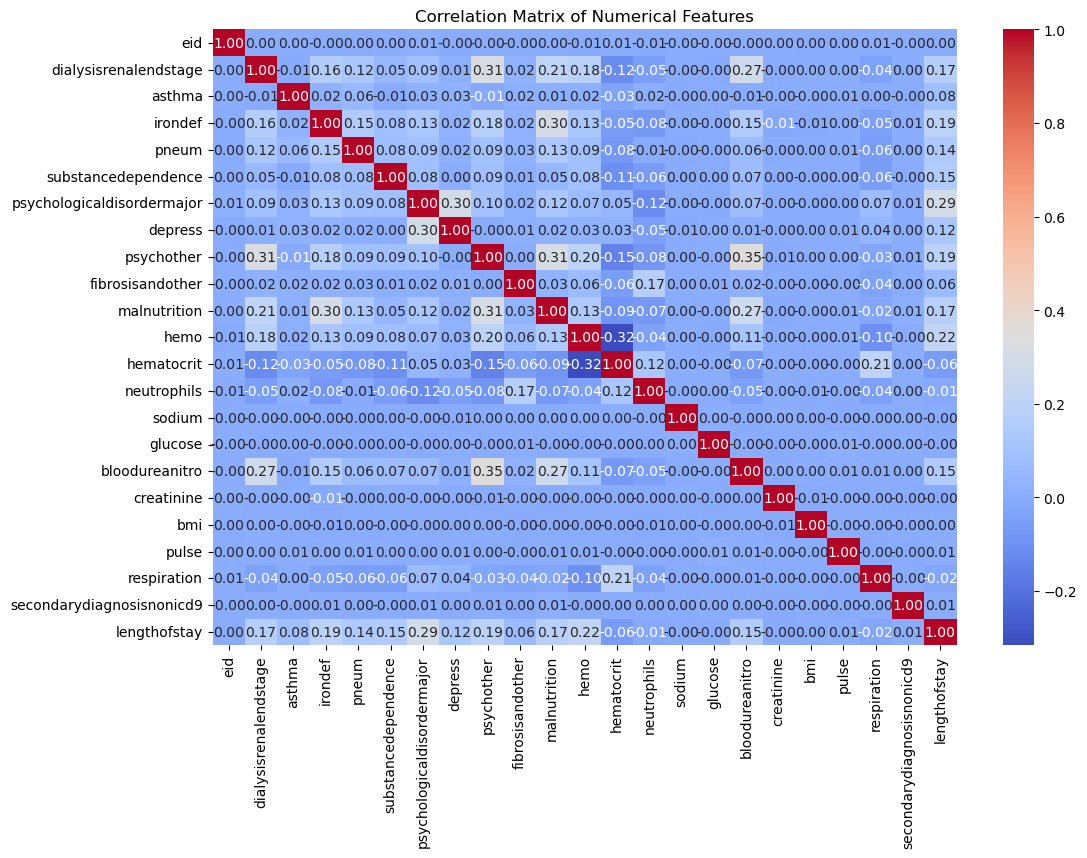

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Correlation matrix for numerical columns
correlation_matrix = data_eda.corr()

print(correlation_matrix['lengthofstay'].sort_values(ascending=False))
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

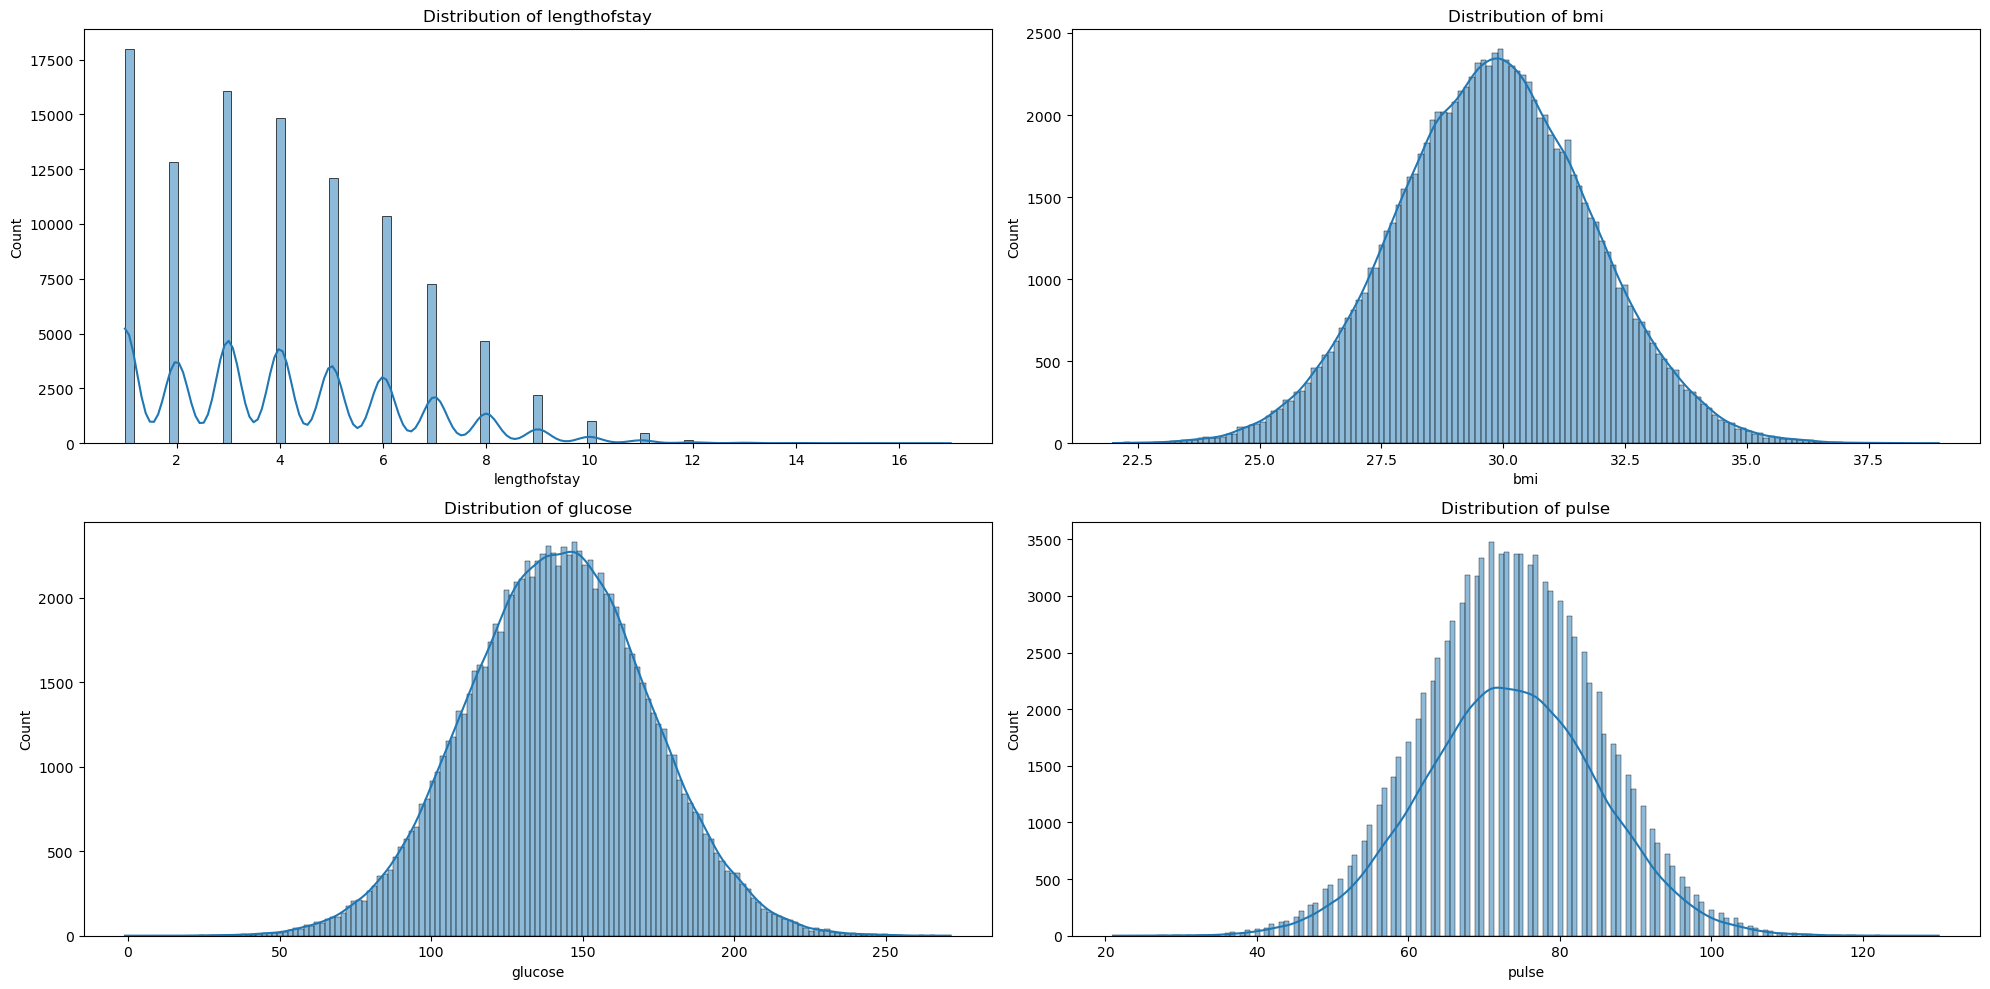

In [25]:
# 4. Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))

for i, col in enumerate(['lengthofstay', 'bmi', 'glucose', 'pulse']):
    plt.subplot(2, 2, i+1)
    sns.histplot(data_eda[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
              

# Prepare the results for descriptive stats and categorical distributions
#descriptive_stats, categorical_distributions

 Length of Stay Distribution:
 1     17979
2     12825
3     16068
4     14822
5     12116
6     10362
7      7263
8      4652
9      2184
10     1000
11      460
12      137
13       75
14       31
15       16
16        6
17        4
Name: lengthofstay, dtype: int64


Text(0, 0.5, 'Frequency')

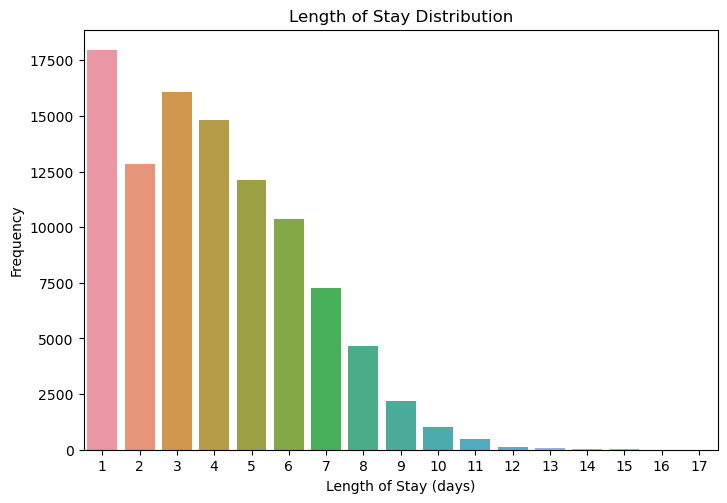

In [37]:
# Further EDA: Exploring additional aspects of the dataset

# 4. Length of Stay Distribution
# Analyzing the distribution of the length of stay in the hospital
length_of_stay_distribution = data_eda['lengthofstay'].value_counts().sort_index()

print(" Length of Stay Distribution:\n",length_of_stay_distribution)


plt.figure(figsize=(18, 12))

# Length of Stay Distribution
plt.subplot(2, 2, 1)
sns.barplot(x=length_of_stay_distribution.index, y=length_of_stay_distribution.values)
plt.title('Length of Stay Distribution')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')


Readmission count :
 0     55031
1     15007
2      9987
3      8047
4      6941
5+     4987
Name: rcount, dtype: int64


Text(0, 0.5, 'Frequency')

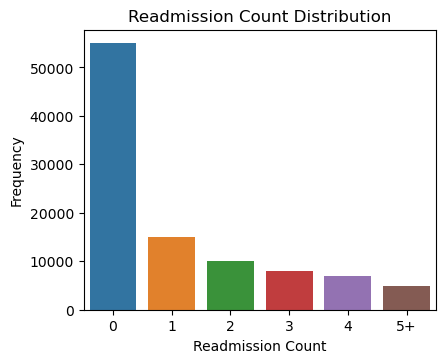

In [41]:
# 5. Analysis of Readmission Rates

readmission_distribution = data_eda['rcount'].value_counts()
print("Readmission count :\n",readmission_distribution)

# Readmission Distribution

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 2)
sns.barplot(x=readmission_distribution.index, y=readmission_distribution.values)
plt.title('Readmission Count Distribution')
plt.xlabel('Readmission Count')
plt.ylabel('Frequency')

BMI Categories : Overweight    53152
Obese         46042
Normal          806
Name: bmi_category, dtype: int64


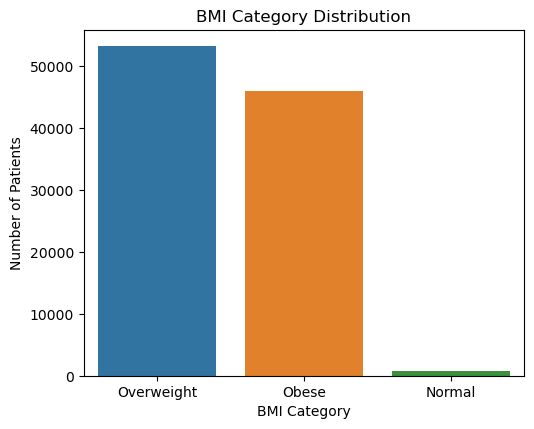

In [42]:
# 6. Analysis of BMI Categories

def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi >= 18.5 and bmi < 25:
        return 'Normal'
    elif bmi >= 25 and bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

data_eda['bmi_category'] = data_eda['bmi'].apply(bmi_category)
bmi_category_distribution = data_eda['bmi_category'].value_counts()

print("BMI Categories :",bmi_category_distribution)

plt.figure(figsize=(10,8))
# BMI Category Distribution
plt.subplot(2, 2, 3)
sns.barplot(x=bmi_category_distribution.index, y=bmi_category_distribution.values)
plt.title('BMI Category Distribution')
plt.xlabel('BMI Category')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()


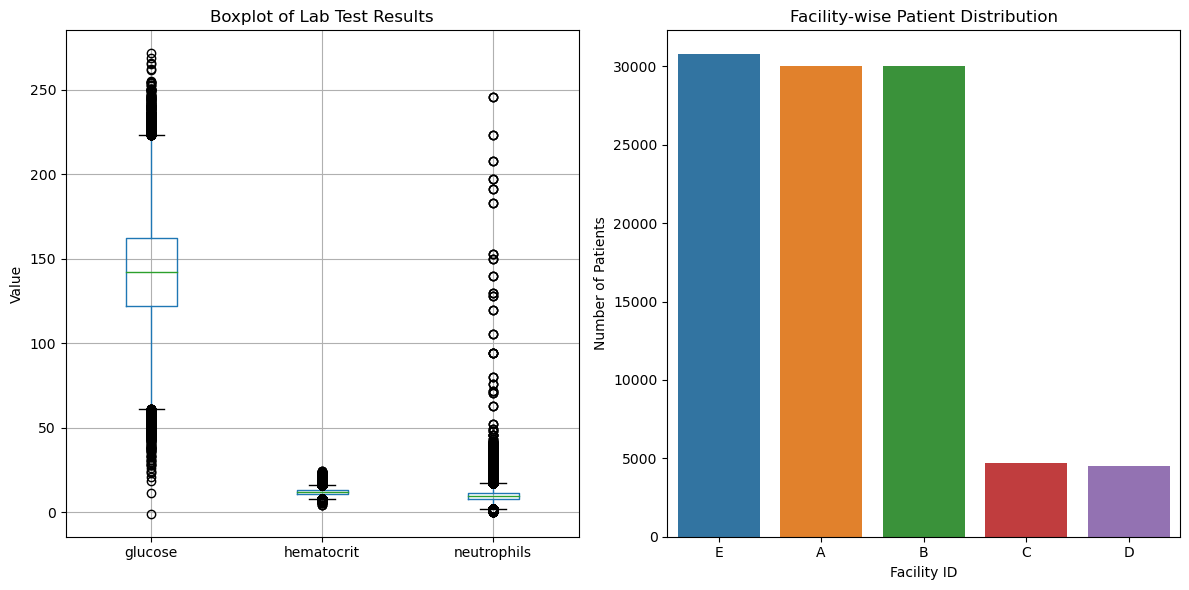

(             glucose     hematocrit    neutrophils
 count  100000.000000  100000.000000  100000.000000
 mean      141.963384      11.975939      10.177455
 std        29.992996       2.031792       5.353131
 min        -1.005927       4.400000       0.100000
 25%       121.682383      10.900000       7.700000
 50%       142.088545      11.900000       9.400000
 75%       162.180996      12.900000      11.500000
 max       271.444277      24.100000     245.900000,
 E    30755
 A    30035
 B    30012
 C     4699
 D     4499
 Name: facid, dtype: int64)

In [43]:
# Revised EDA: Focusing on lab tests and facility distribution

# 8. Analysis of Common Lab Test Results
# Focusing on glucose, hematocrit, and neutrophils
lab_tests = ['glucose', 'hematocrit', 'neutrophils']
lab_tests_distribution = data_eda[lab_tests].describe()

# 9. Facility-wise Analysis
# Analyzing the distribution of patients across different facilities
facility_distribution = data_eda['facid'].value_counts()

# Visualizations
plt.figure(figsize=(12, 6))

# Boxplot for Lab Tests
plt.subplot(1, 2, 1)
data_eda.boxplot(column=lab_tests)
plt.title('Boxplot of Lab Test Results')
plt.ylabel('Value')

# Facility Distribution
plt.subplot(1, 2, 2)
sns.barplot(x=facility_distribution.index, y=facility_distribution.values)
plt.title('Facility-wise Patient Distribution')
plt.xlabel('Facility ID')
plt.ylabel('Number of Patients')

plt.tight_layout()
plt.show()

lab_tests_distribution, facility_distribution

